In [124]:
##Code created by Taylor Portwood
#import dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import gmaps

#read in CSV file
home_df = pd.read_csv('Metro_Zhvi_AllHomes (1).csv')

#drop unnecessary columns
home_df.drop(["RegionID", "SizeRank"], axis = 1)

,RegionName,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,United States,204708.0,203742.0,202810.0,200931.3333,199143.6667,197420.0,195791.6667,194096.3333,192482.6667,...,237154,237945.3333,238624.6667,239270.0000,239882.0000,240460.3333,241057.0000,241730.6667,242470.6667,243225.3333
1,"Atlanta, GA",193619.0,192713.0,191834.0,190368.3333,189135.3333,188028.0,186794.6667,185446.6667,184112.3333,...,229316,230491.3333,231669.6667,232602.0000,232897.6667,233357.6667,234031.6667,235044.0000,235879.0000,236768.6667
2,Summerhill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,352489,357064.0000,359766.0000,363067.3333,364086.6667,365395.0000,364949.3333,364914.0000,364046.0000,364488.3333


In [125]:
#we want to filter columns to be able to review relevant data in our dataframe. new_columns will store the columns we want
new_columns = []

#this loop goes through each month and year from 2015 to 2019 and adds it to the new_columns list
for i in range(2015, 2020):
    for j in range(1,13):
        if i == 2019 and j == 12:
            break
        if j < 10:
            new_columns.append(str(i) + '-0' + str(j))
        else:
            new_columns.append(str(i) + '-'+ str(j))

#specify that we only want to look at the data from the new_columns list (i.e., we are dropping the columns from before 2015)
home_df = home_df[new_columns]

#transpose data to make it easier to use in matplotlib
home_df = home_df.transpose()

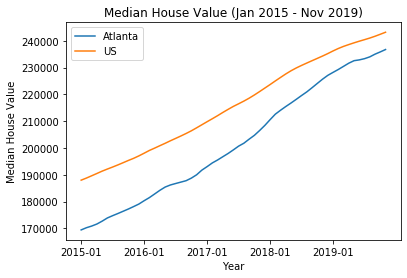

In [126]:
#plot home value vs. time for US and Atlanta
plt.plot(home_df.index,home_df[home_df.columns[1]])
plt.plot(home_df.index, home_df[home_df.columns[0]])

#Space out xticks so they are more readable
plt.xticks([0, 12, 24, 36, 48])

#label x and y axes
plt.xlabel("Year")
plt.ylabel("Median House Value")

#add title to plot
plt.title("Median House Value (Jan 2015 - Nov 2019)")

#add legend to plot
plt.legend(["Atlanta", "US"])

#save figure
plt.savefig("AtlantavsUS.png")

In [135]:
#home_df["Percent Change"] = home_df[""]
home_df["Percent Change_US"] = (home_df[0]["2019-11"] - home_df[0]["2015-01"]) / home_df[0]["2019-11"] * 100
home_df["Percent Change_Atlanta"] = (home_df[1]["2019-11"] - home_df[1]["2015-01"]) / home_df[1]["2019-11"] * 100

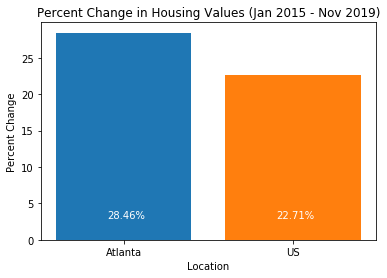

In [152]:
plt.bar(x="Atlanta", height = home_df["Percent Change_Atlanta"][1])
plt.bar(x="US", height = home_df["Percent Change_US"])
plt.xlabel("Location")
plt.ylabel("Percent Change")
plt.text(x=-0.1, y = 3, c="White", s="%.2f" %home_df["Percent Change_Atlanta"][1] + '%')
plt.text(x=0.9, y = 3, c="White", s="%.2f" %home_df["Percent Change_US"][1] + '%')
plt.title("Percent Change in Housing Values (Jan 2015 - Nov 2019)")
plt.savefig("AtlantavsUSBar.png")